In [9]:
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser
# catalogue_filename = 'd:\\OneDrive\\04. Docente\\02. PUCE ARQ\\02. ANALISIS SISMICO MAESTRIA\\06. DocumentosClases\\00. EjerciciosClases\\03\\04. OpenQuake\\BSSA2013.csv'
catalogue_filename = 'd:\\OneDrive\\04. Docente\\02. PUCE ARQ\\02. ANALISIS SISMICO MAESTRIA\\06. DocumentosClases\\00. EjerciciosClases\\03\\04. OpenQuake\\ISC_GEM.csv'

print(catalogue_filename)

parser = CsvCatalogueParser ( catalogue_filename )
catalogue = parser.read_file ()

['Original Catalogue size:' , (len(catalogue))]

d:\OneDrive\04. Docente\02. PUCE ARQ\02. ANALISIS SISMICO MAESTRIA\06. DocumentosClases\00. EjerciciosClases\03\04. OpenQuake\ISC_GEM.csv


['Original Catalogue size:', 682]

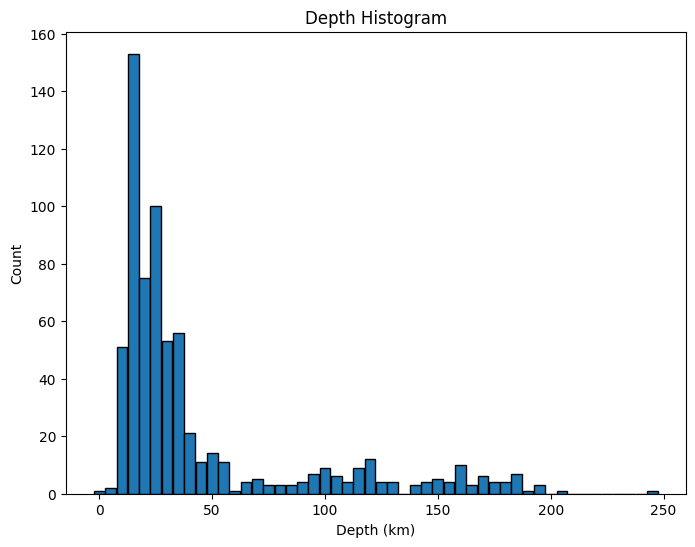

In [10]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define depth bins for (e.g)
 # 0. - 300 km in intervals of 10 km
depth_bins = np.arange (0. , 300. , 10.)

# Get normalised histograms ( without bootstrapping )
depth_hist = catalogue.get_depth_distribution (
    depth_bins ,
    normalisation = True )

from openquake.hmtk.plotting.seismicity.catalogue_plots import plot_depth_histogram


depth_bin = 5.0
plot_depth_histogram(catalogue ,depth_bin )

In [11]:
# Define depth bins for (e.g)
# 0. - 150 km in intervals of 55 km

depth_bins = np.arange (0 , 300 , 5)

# Define magnitude bins (e.g.) 2.5 - 7.6 in intervals of 0.1
magnitude_bins = np.arange (4.0 , 9.0 , 0.5)

# Get normalised histograms ( without bootstrapping )
m_d_hist = catalogue.get_magnitude_depth_distribution (
    magnitude_bins,
    depth_bins,
    normalisation=True,
    bootstrap=None )


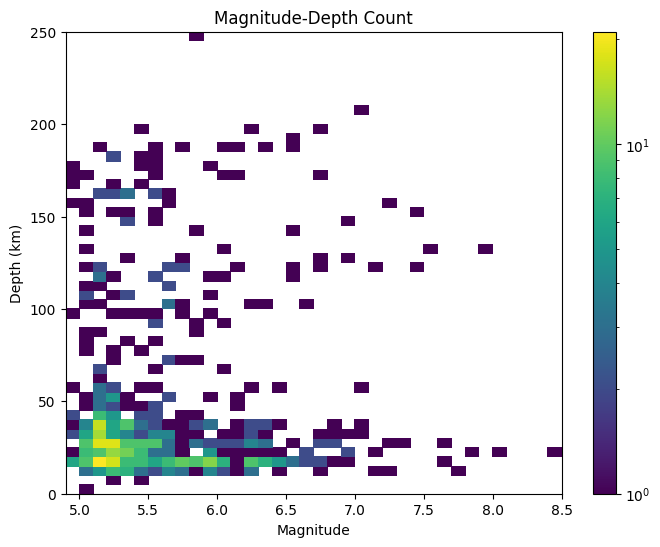

In [12]:
from openquake . hmtk . plotting . seismicity . catalogue_plots import plot_magnitude_depth_density
magnitude_bin = 0.1
depth_bin = 5.0
plot_magnitude_depth_density (
    catalogue ,
    magnitude_bin,
    depth_bin ,
    logscale =True ) 


In [13]:
# Define annual time bins from 1900 CE to 2012 CE
time_bins = np. arange (1900. , 2013. , 1.)
# Define magnitude bins (e.g.) 2.5 - 7.6 in intervals of 0.1
magnitude_bins = np. arange (2.5 , 7.7 , 0.1)
# Get normalised histograms ( without bootstrapping )
mag_time_hist = catalogue . get_magnitude_time_distribution (
magnitude_bins ,
time_bins ,
normalisation =True ,
bootstrap = None )

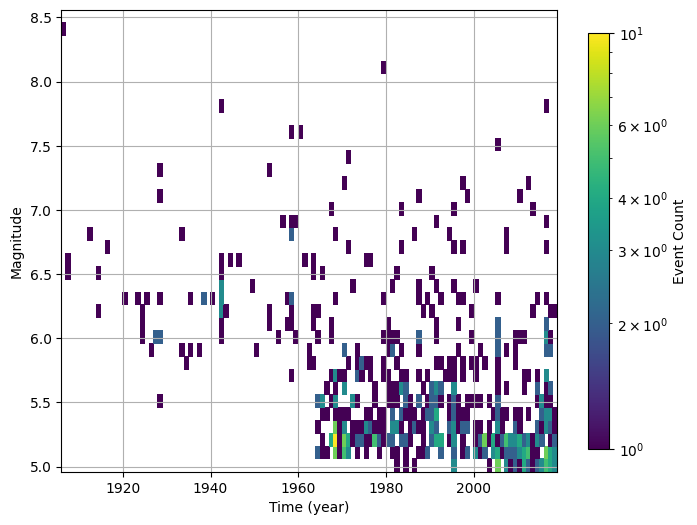

In [14]:
from openquake . hmtk . plotting . seismicity . catalogue_plots import plot_magnitude_time_density
magnitude_bin_width = 0.1
time_bin_width = 1
plot_magnitude_time_density ( catalogue ,
    magnitude_bin_width ,
    time_bin_width )

In [15]:
from openquake.hmtk.seismicity.declusterer.distance_time_windows import UhrhammerWindow

declust_config = {
    'time_distance_window': UhrhammerWindow (),
    'fs_time_prop': 1.0}

from openquake.hmtk.seismicity.declusterer.dec_gardner_knopoff import GardnerKnopoffType1

declustering = GardnerKnopoffType1 ()
cluster_index , cluster_flag = declustering.decluster ( catalogue , declust_config )

# To simply add the clustering information to the data dictionary simply type:
catalogue.data [' Cluster_Index '] = cluster_index
catalogue.data [' Cluster_Flag  '] = cluster_flag

# Alternatively, to purge the catalogue of non-Poissonian events:
mainshock_flag = cluster_flag == 0
catalogue.purge_catalogue ( mainshock_flag )
catalogue1=catalogue
['Catalogue size:' , (len(catalogue1))]

['Catalogue size:', 455]

In [16]:
from openquake.hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter
catalogue_outputfile = 'CatalogoTratado.csv'
output = CsvCatalogueWriter(catalogue_outputfile)
output.write_file(catalogue1)

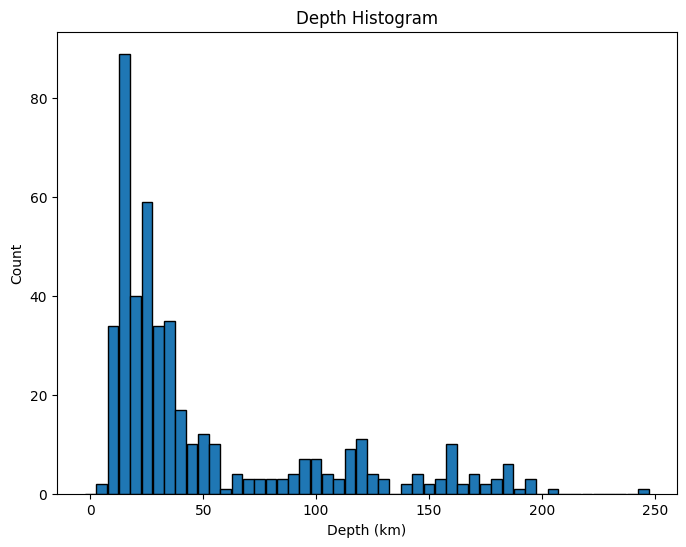

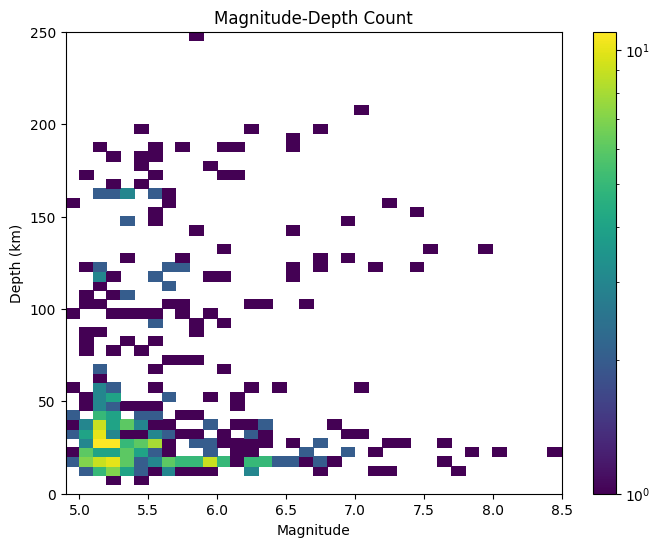

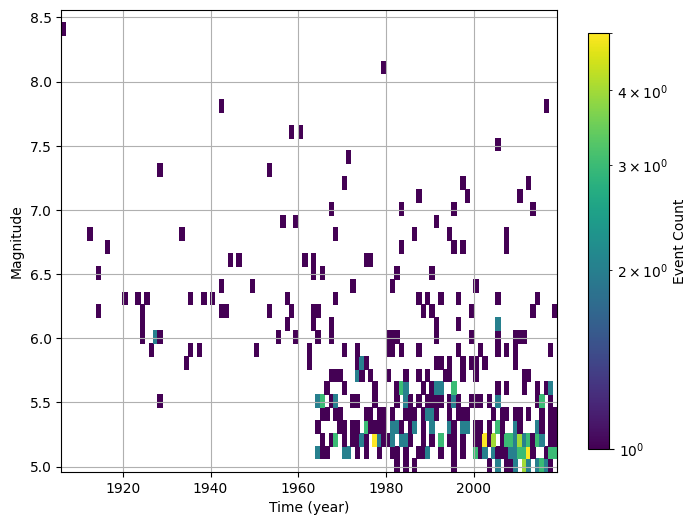

In [17]:
plot_depth_histogram(catalogue ,depth_bin )

plot_magnitude_depth_density (
    catalogue1 ,
    magnitude_bin,
    depth_bin ,
    logscale =True ) 

plot_magnitude_time_density ( catalogue1 ,
    magnitude_bin_width ,
    time_bin_width )